In [ ]:
# resize
# crop
# flip
# brightness and contrast

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
name = './trees.jpg'
#读入：返回string
img_string = tf.read_file(name)
#将string解析成图片
img_decoded = tf.image.decode_image(img_string)

In [ ]:
sess = tf.Session()

#用sess执行这个图
img_decoded_val = sess.run(img_decoded)
print(img_decoded_val.shape)


#显示图片
%matplotlib inline
imshow(img_decoded_val)

### Resize

In [ ]:
#tf.image.resize_area
#tf.image.resize_bicubic #放大，有空白像素：用二次线性函数来插入
#tf.image.resize_nearest_neighbor #放大：用最近的像素点插入

In [ ]:
name = './trees.jpg'
img_string = tf.read_file(name)
img_decoded = tf.image.decode_image(img_string)

#因为tf.image.resize_bicubic()处理的是batch数据，所以需要4维输入，第一维就是图片数
shape = img_decoded_val.shape
img_decoded = tf.reshape(img_decoded, [1, shape[0], shape[1], shape[2]])

#在img_decoded上面加工：
resize_img = tf.image.resize_bicubic(img_decoded, [shape[0]*2, shape[1]*2])

sess = tf.Session()
img_decoded_val = sess.run(resize_img)

#需要将4维改成3维：
print(img_decoded_val.shape)#(1, 4896, 6528, 3)
img_decoded_val = img_decoded_val.reshape((shape[0]*2, shape[1]*2, shape[2]))
print(img_decoded_val.shape)

#需要做类型变换：从[0,1]之间的小数float 改为 [0,255]integer 
img_decoded_val = np.asarray(img_decoded_val, np.uint8)

%matplotlib inline
imshow(img_decoded_val)

### Crop

In [ ]:
# tf.image.pad_to_bounding_box : 将图像放到画布上，周边都是黑色的
# tf.image.crop_to_bounding_box : 裁剪到画布上
# tf.random_crop: 随机裁剪

(1, 5000, 8000, 3)
(5000, 8000, 3)


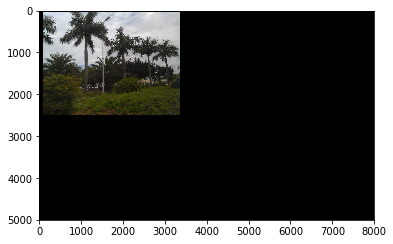

In [5]:
name = './trees.jpg'
img_string = tf.read_file(name)
img_decoded = tf.image.decode_image(img_string)

sess = tf.Session()
#用sess执行这个图
img_decoded_val = sess.run(img_decoded)

#因为tf.image.resize_bicubic()处理的是batch数据，所以需要4维输入，第一维就是图片数
shape = img_decoded_val.shape
img_decoded = tf.reshape(img_decoded, [1, shape[0], shape[1], shape[2]])

#在img_decoded上面加工：
padded_img = tf.image.pad_to_bounding_box(img_decoded, 50, 100, 5000, 8000) #在(500,800)的画布上，将图片的左上角放在(50,100)的位置上。其中50是y轴，100是x轴。

sess = tf.Session()
img_decoded_val = sess.run(padded_img)

#需要将4维改成3维：
print(img_decoded_val.shape)#(1, 4896, 6528, 3)
img_decoded_val = img_decoded_val.reshape((5000,8000,3))
print(img_decoded_val.shape)

#需要做类型变换：从[0,1]之间的小数float 改为 [0,255]integer 
img_decoded_val = np.asarray(img_decoded_val, np.uint8)

%matplotlib inline
imshow(img_decoded_val)

### Flip

In [ ]:
# tf.image.flip_up_down
# tf.image.flip_left_right
# tf.image.random_flip_up_down
# tf.image.random_flip_left_right

(1, 2448, 3264, 3)
(2448, 3264, 3)


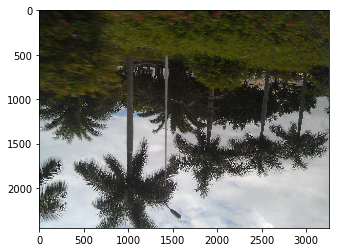

In [6]:
name = './trees.jpg'
img_string = tf.read_file(name)
img_decoded = tf.image.decode_image(img_string)

sess = tf.Session()
#用sess执行这个图
img_decoded_val = sess.run(img_decoded)

#因为tf.image.resize_bicubic()处理的是batch数据，所以需要4维输入，第一维就是图片数
shape = img_decoded_val.shape
img_decoded = tf.reshape(img_decoded, [1, shape[0], shape[1], shape[2]])

#在img_decoded上面加工：
flipped_img = tf.image.flip_up_down(img_decoded)

sess = tf.Session()
img_decoded_val = sess.run(flipped_img)

#需要将4维改成3维：
print(img_decoded_val.shape)#(1, 4896, 6528, 3)
img_decoded_val = img_decoded_val.reshape((shape[0], shape[1], shape[2]))
print(img_decoded_val.shape)

#需要做类型变换：从[0,1]之间的小数float 改为 [0,255]integer 
img_decoded_val = np.asarray(img_decoded_val, np.uint8)

%matplotlib inline
imshow(img_decoded_val)

### Brightness
用途：让机器学习在不同光照下的人脸数据，达到数据增强效果

In [ ]:
# tf.image.adjust_brightness
# tf.image.random_brightness
# tf.image.adjust_contrast
# tf.image.random_contrast #我认为random的用途是数据增强，随机制作新的图像

(1, 2448, 3264, 3)
(2448, 3264, 3)


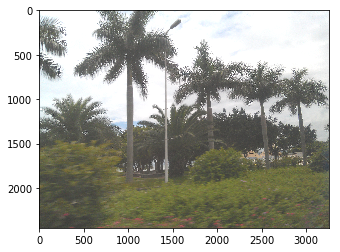

In [9]:
name = './trees.jpg'
img_string = tf.read_file(name)
img_decoded = tf.image.decode_image(img_string)

sess = tf.Session()
#用sess执行这个图
img_decoded_val = sess.run(img_decoded)

#因为tf.image.resize_bicubic()处理的是batch数据，所以需要4维输入，第一维就是图片数
shape = img_decoded_val.shape
img_decoded = tf.reshape(img_decoded, [1, shape[0], shape[1], shape[2]])

#在img_decoded上面加工：
brightened_img = tf.image.adjust_brightness(img_decoded, 0.2) #增加20%的光照

sess = tf.Session()
img_decoded_val = sess.run(brightened_img)

#需要将4维改成3维：
print(img_decoded_val.shape)#(1, 4896, 6528, 3)
img_decoded_val = img_decoded_val.reshape((shape[0], shape[1], shape[2]))
print(img_decoded_val.shape)

#需要做类型变换：从[0,1]之间的小数float 改为 [0,255]integer 
img_decoded_val = np.asarray(img_decoded_val, np.uint8)

%matplotlib inline
imshow(img_decoded_val)

(1, 2448, 3264, 3)
(2448, 3264, 3)


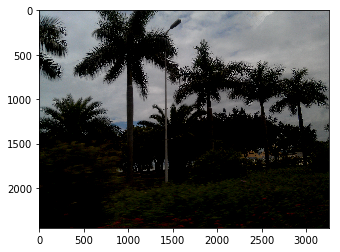

In [10]:
name = './trees.jpg'
img_string = tf.read_file(name)
img_decoded = tf.image.decode_image(img_string)

sess = tf.Session()
#用sess执行这个图
img_decoded_val = sess.run(img_decoded)

#因为tf.image.resize_bicubic()处理的是batch数据，所以需要4维输入，第一维就是图片数
shape = img_decoded_val.shape
img_decoded = tf.reshape(img_decoded, [1, shape[0], shape[1], shape[2]])

#在img_decoded上面加工：
brightened_img = tf.image.adjust_brightness(img_decoded, -0.2) #减去20%的光照

sess = tf.Session()
img_decoded_val = sess.run(brightened_img)

#需要将4维改成3维：
print(img_decoded_val.shape)#(1, 4896, 6528, 3)
img_decoded_val = img_decoded_val.reshape((shape[0], shape[1], shape[2]))
print(img_decoded_val.shape)

#需要做类型变换：从[0,1]之间的小数float 改为 [0,255]integer 
img_decoded_val = np.asarray(img_decoded_val, np.uint8)

%matplotlib inline
imshow(img_decoded_val)